# Segmentation 

This notebook shows how to use Cellpose (generalist algorithm for cellular segmentation) as a part of a segmentation-classification-tracking analysis pipeline. 

The sections of this notebook are as follows:

1. Load images
2. Segment an initial image to test Cellpose parameters
3. Batch segment a sequence of images

The data used in this notebook is timelapse microscopy data with h2b-gfp/rfp markers that show the spatial extent of the nucleus and it's mitotic state. 

This notebook uses the dask octopuslite image loader from the CellX/Lowe lab project.

In [1]:
from octopuslite import DaskOctopusLiteLoader
from cellpose import models, io, plot
from tqdm import tqdm
import matplotlib.pyplot as plt
import os
import numpy as np
from skimage.io import imread, imshow, imsave
%matplotlib inline

2022-03-25 14:34:07,533 [INFO] WRITING LOG OUTPUT TO /home/nathan/.cellpose/run.log


## 1. Load images

In [10]:
# define experiment ID and select a position
expt = 'ND0022'
pos = 'Pos12'
# point to where the data is
root_dir = '/home/nathan/data/kraken/ras/'
image_path = f'{root_dir}/{expt}/{pos}/{pos}_images'
# lazily load images
images = DaskOctopusLiteLoader(image_path, 
                               remove_background = False)
images.channels

[<Channels.BRIGHTFIELD: 0>,
 <Channels.GFP: 1>,
 <Channels.RFP: 2>,
 <Channels.IRFP: 3>]

Set segmentation channel and load test image 

In [11]:
# segmentation channel
segmentation_channel = images.channels[1]
# set test image index
frame = 1000
# load test image 
img = images[segmentation_channel.name][frame].compute()
img.shape

ch1 = images['gfp'][frame].compute()
ch2 = images['rfp'][frame].compute()
# create 2-channel image
img = np.zeros((ch1.shape[0], ch1.shape[1] ,2), dtype = 'uint8') 
img[:,:,0] = ch1
img[:,:,1] = ch2

## 2. Load model and test segment single image

In [14]:
# define channels for cellpose, grayscale=0, R=1, G=2, B=3, channels = [cytoplasm, nucleus]
channels = [2,None]
# set diameter of segments for cellpose, if set to None then size of cells estimated per image
diameter = None
# Define cellpose model_type='cyto' or model_type='nuclei'
model_type='cyto2'
## define model type
model = models.Cellpose(gpu=False, model_type = model_type)

2022-03-25 14:41:08,950 [INFO] >>>> using CPU


### 2.1 Test run and display initial results

# grayscale single chan

2022-03-25 14:41:10,864 [INFO] ~~~ ESTIMATING CELL DIAMETER(S) ~~~
2022-03-25 14:41:32,502 [INFO] estimated cell diameter(s) in 21.64 sec
2022-03-25 14:41:32,503 [INFO] >>> diameter(s) = 
2022-03-25 14:41:32,503 [INFO] [ 39.66 ]
2022-03-25 14:41:32,504 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 14:42:02,144 [INFO] >>>> TOTAL TIME 51.28 sec


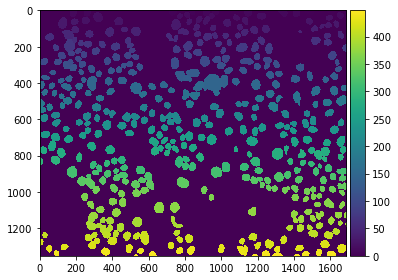

In [15]:
masks, flows, styles, diams = model.eval(ch1, diameter = diameter, channels = channels)
imshow(masks)

2022-03-25 14:52:09,017 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 14:52:13,917 [INFO] >>>> TOTAL TIME 4.90 sec


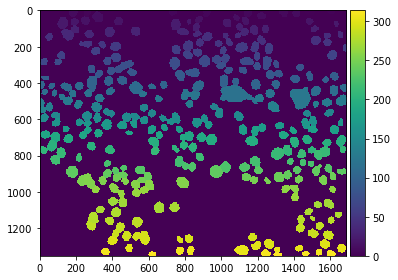

In [25]:
masks, flows, styles, diams = model.eval(ch1, diameter = 120, channels = [0,None])
imshow(masks)

# ND22 Pos12 grayscale into rgb

In [16]:
ch1 = images['gfp'][frame].compute()
ch2 = images['rfp'][frame].compute()

r = ch2.astype(int)
g = ch1.astype(int)
b = np.zeros(ch1.shape).astype(int)

In [17]:
rgb = np.dstack((r,g,b))

2022-03-25 14:42:38,512 [INFO] ~~~ ESTIMATING CELL DIAMETER(S) ~~~
2022-03-25 14:42:58,344 [INFO] estimated cell diameter(s) in 19.83 sec
2022-03-25 14:42:58,345 [INFO] >>> diameter(s) = 
2022-03-25 14:42:58,345 [INFO] [ 39.75 ]
2022-03-25 14:42:58,346 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 14:43:27,416 [INFO] >>>> TOTAL TIME 48.90 sec


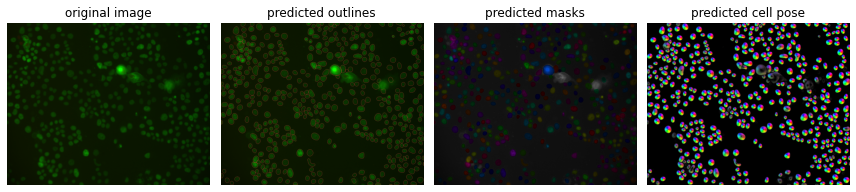

In [18]:
## run cellpose on test image
# define channels for cellpose, grayscale=0, R=1, G=2, B=3, channels = [cytoplasm, nucleus]
channels = [2,1]
diameter = None
masks, flows, styles, diams = model.eval(rgb, diameter = diameter, channels = channels)
## display results
fig = plt.figure(figsize=(12,5))
plot.show_segmentation(fig, rgb, masks, flows[0], channels=channels)
plt.tight_layout()
plt.show()

2022-03-25 14:44:41,712 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 14:44:46,363 [INFO] >>>> TOTAL TIME 4.65 sec


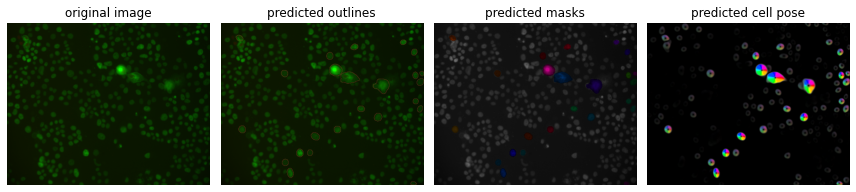

In [19]:
## run cellpose on test image
# define channels for cellpose, grayscale=0, R=1, G=2, B=3, channels = [cytoplasm, nucleus]
channels = [2,1]
diameter = 120
masks, flows, styles, diams = model.eval(rgb, diameter = diameter, channels = channels)
## display results
fig = plt.figure(figsize=(12,5))
plot.show_segmentation(fig, rgb, masks, flows[0], channels=channels)
plt.tight_layout()
plt.show()

2022-03-25 14:44:58,057 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 14:45:04,684 [INFO] >>>> TOTAL TIME 6.63 sec


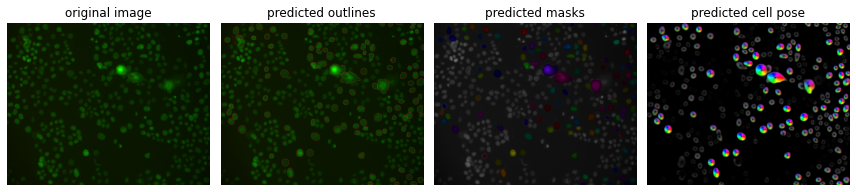

In [20]:
## run cellpose on test image
# define channels for cellpose, grayscale=0, R=1, G=2, B=3, channels = [cytoplasm, nucleus]
channels = [2,1]
diameter = 100
masks, flows, styles, diams = model.eval(rgb, diameter = diameter, channels = channels)
## display results
fig = plt.figure(figsize=(12,5))
plot.show_segmentation(fig, rgb, masks, flows[0], channels=channels)
plt.tight_layout()
plt.show()

2022-03-25 14:45:31,929 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 14:45:40,935 [INFO] >>>> TOTAL TIME 9.01 sec


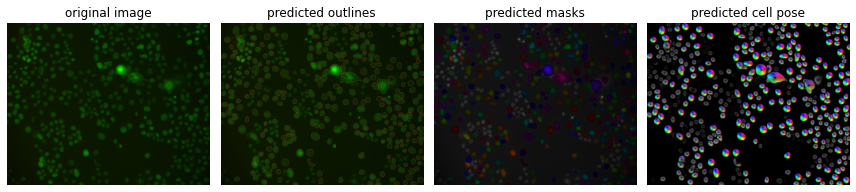

In [21]:
## run cellpose on test image
# define channels for cellpose, grayscale=0, R=1, G=2, B=3, channels = [cytoplasm, nucleus]
channels = [2,1]
diameter = 80
masks, flows, styles, diams = model.eval(rgb, diameter = diameter, channels = channels)
## display results
fig = plt.figure(figsize=(12,5))
plot.show_segmentation(fig, rgb, masks, flows[0], channels=channels)
plt.tight_layout()
plt.show()

2022-03-25 14:45:56,345 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 14:45:58,457 [INFO] >>>> TOTAL TIME 2.11 sec


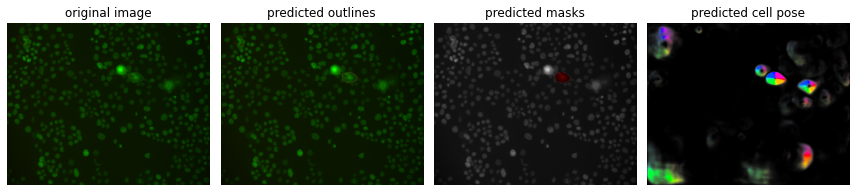

In [22]:
## run cellpose on test image
# define channels for cellpose, grayscale=0, R=1, G=2, B=3, channels = [cytoplasm, nucleus]
channels = [2,1]
diameter = 200
masks, flows, styles, diams = model.eval(rgb, diameter = diameter, channels = channels)
## display results
fig = plt.figure(figsize=(12,5))
plot.show_segmentation(fig, rgb, masks, flows[0], channels=channels)
plt.tight_layout()
plt.show()

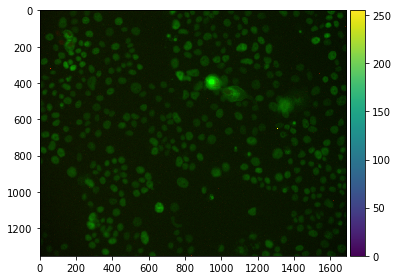

In [97]:
imshow(rgb)

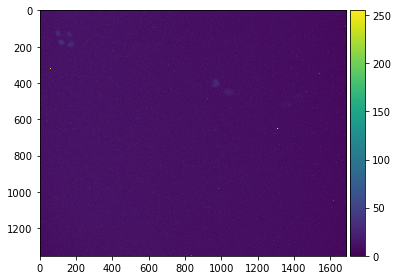

In [23]:
imshow(r)

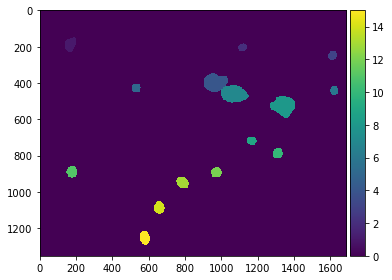

In [99]:
imshow(masks)

# RGB image

2022-03-25 13:25:54,648 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 13:25:58,839 [INFO] >>>> TOTAL TIME 4.19 sec


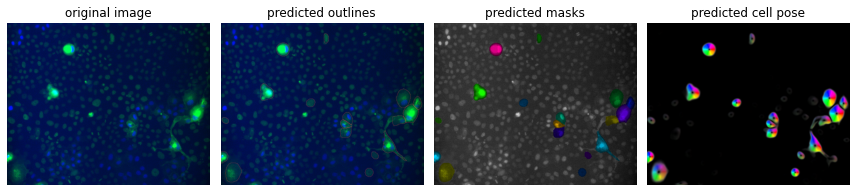

In [68]:
## run cellpose on test image
# define channels for cellpose, grayscale=0, R=1, G=2, B=3, channels = [cytoplasm, nucleus]
channels = [2,3]
img = io.imread('/home/nathan/cellpose_test.jpg')
diameter = 120
masks, flows, styles, diams = model.eval(img, diameter = diameter, channels = channels)
## display results
fig = plt.figure(figsize=(12,5))
plot.show_segmentation(fig, img, masks, flows[0], channels=[2,1])
plt.tight_layout()
plt.show()

In [69]:
img.shape

(1352, 1688, 3)

In [71]:
### deconstructing rgb and loading as grayscale 
r = img[...,0]
g = img[...,1]
b = img[...,2]
rgb = np.dstack((r,g,b))

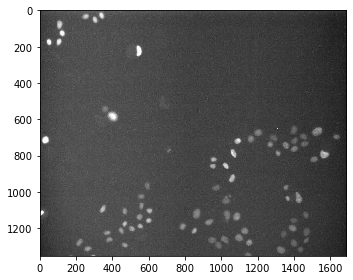

In [77]:
imshow(b)

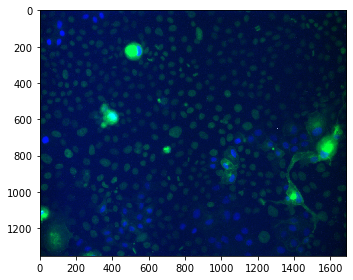

In [78]:
imshow(rgb)

# cyto2

In [105]:
model = models.Cellpose(gpu=False, model_type = 'cyto2')

2022-03-25 13:58:01,727 [INFO] >>>> using CPU


2022-03-25 13:56:05,884 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 13:56:11,288 [INFO] >>>> TOTAL TIME 5.40 sec


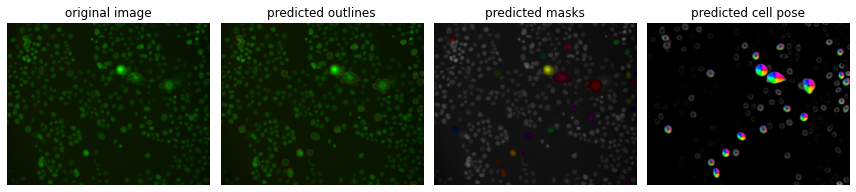

In [102]:
## run cellpose on test image
# define channels for cellpose, grayscale=0, R=1, G=2, B=3, channels = [cytoplasm, nucleus]
channels = [2,1]
diameter = 120
masks, flows, styles, diams = model.eval(rgb, diameter = diameter, channels = channels)
## display results
fig = plt.figure(figsize=(12,5))
plot.show_segmentation(fig, rgb, masks, flows[0], channels=channels)
plt.tight_layout()
plt.show()

/home/nathan/analysis/miniconda3/envs/cellx/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


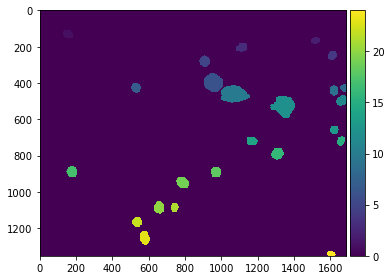

In [103]:
imshow(masks)

# omnipose

In [6]:
import omnipose

In [9]:
model = models.Cellpose(gpu=False, model_type = 'cyto2_omni')

2022-03-25 14:36:42,614 [INFO] >>>> using CPU
2022-03-25 14:36:42,616 [INFO] >>cyto<< model set to be used


FileNotFoundError: [Errno 2] No such file or directory: '/home/nathan/.cellpose/models/size_cyto2_omnitorch_0.npy'

# dim image settings

In [8]:
# define experiment ID and select a position
expt = 'ND0013'
pos = 'Pos4'
# point to where the data is
root_dir = '/home/nathan/data/kraken/ras/'
image_path = f'{root_dir}/{expt}/{pos}/{pos}_images'
# lazily load images
images = DaskOctopusLiteLoader(image_path, 
                               remove_background = False)
images.channels

[<Channels.BRIGHTFIELD: 0>,
 <Channels.GFP: 1>,
 <Channels.RFP: 2>,
 <Channels.IRFP: 3>,
 <Channels.MASK_GFP: 98>,
 <Channels.MASK: 99>]

In [12]:
irfp = images['irfp'][1000]
gfp = images['gfp'][1000]

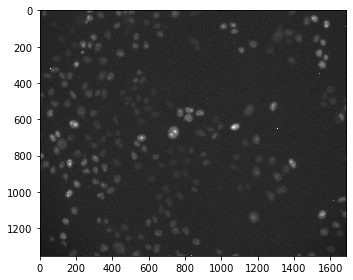

In [11]:
imshow(img)

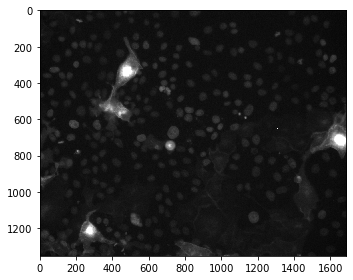

In [13]:
imshow(gfp)

2022-03-25 14:24:08,587 [INFO] ~~~ ESTIMATING CELL DIAMETER(S) ~~~
2022-03-25 14:24:41,921 [INFO] estimated cell diameter(s) in 33.33 sec
2022-03-25 14:24:41,922 [INFO] >>> diameter(s) = 
2022-03-25 14:24:41,922 [INFO] [ 37.83 ]
2022-03-25 14:24:41,923 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 14:25:13,763 [INFO] >>>> TOTAL TIME 65.18 sec


/home/nathan/analysis/miniconda3/envs/cellx/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


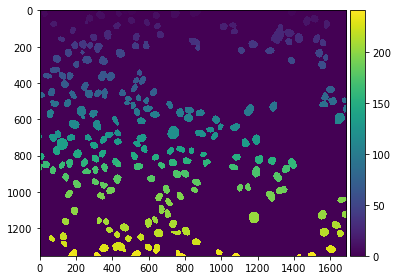

In [20]:
# define channels for cellpose, grayscale=0, R=1, G=2, B=3, channels = [cytoplasm, nucleus]
channels = [None,0]
diameter = None
masks, flows, styles, diams = model.eval(irfp, diameter = diameter, channels = channels)
## display results
imshow(masks)

In [24]:
# define channels for cellpose, grayscale=0, R=1, G=2, B=3, channels = [cytoplasm, nucleus]
channels = [None,0]
diameter = None
masks, flows, styles, diams = model.eval(irfp, diameter = diameter, channels = channels, threshold = 0.4)
## display results
imshow(masks)

TypeError: eval() got an unexpected keyword argument 'threshold'

In [29]:
import omnipose

## 3. Batch segment a whole stack of images

When you segment a whole data set you do not want to apply any image transformation. This is so that when you load images and masks later on you can apply the same transformation. You can apply a crop but note that you need to be consistent with your use of the crop from this point on, otherwise you'll get a shift. 

In [ ]:
%%time
for expt in tqdm(['ND0022']):#, 'ND0010', 'ND0011'], position = 0, leave = True):
    for pos in tqdm(['Pos12', 'Pos13'],  position = 0, leave = True):
        print('Starting experiment position:', expt, pos)
        # load images
        image_path = os.path.join(root_dir, f'{expt}/{pos}/{pos}_images')
        images = DaskOctopusLiteLoader(image_path, 
                                      remove_background = False)
        # iterate over images filenames 
        for fn in tqdm(images.files('GFP'), position = 0, leave = True):
            # load cyto green image
            ch1 = imread(fn)
            # load red nuclear image
            ch2 = imread(fn.replace('channel001', 'channel002'))
            #stack into rgb
            r = ch2.astype(int)
            g = ch1.astype(int)
            b = np.zeros(ch1.shape).astype(int)
            rgb = np.dstack((r,g,b))
            # predict labels
            masks, flows, styles, diams = model.eval(rgb, diameter=100, channels = [2,1])
            # set filename as mask format (channel099)
            fn = fn.replace(f'channel001', 'channel098')
            # save results as png in cellpose directory
            #io.save_to_png(img, masks, flows, fn)
            imsave(fn, masks)

  0%|          | 0/2 [00:00<?, ?it/s]

Starting experiment position: ND0022 Pos12


  0%|          | 0/1106 [00:00<?, ?it/s]

2022-03-25 14:57:36,399 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 14:57:43,932 [INFO] >>>> TOTAL TIME 7.53 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000000_z000.tif is a low contrast image
  0%|          | 1/1106 [00:07<2:21:01,  7.66s/it]

2022-03-25 14:57:44,068 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 14:57:51,054 [INFO] >>>> TOTAL TIME 6.99 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000001_z000.tif is a low contrast image
  0%|          | 2/1106 [00:14<2:15:04,  7.34s/it]

2022-03-25 14:57:51,306 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 14:57:58,456 [INFO] >>>> TOTAL TIME 7.15 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000002_z000.tif is a low contrast image
  0%|          | 3/1106 [00:22<2:15:27,  7.37s/it]

2022-03-25 14:57:58,548 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 14:58:04,985 [INFO] >>>> TOTAL TIME 6.44 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000003_z000.tif is a low contrast image
  0%|          | 4/1106 [00:28<2:09:15,  7.04s/it]

2022-03-25 14:58:05,084 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 14:58:11,937 [INFO] >>>> TOTAL TIME 6.85 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000004_z000.tif is a low contrast image
  0%|          | 5/1106 [00:35<2:08:34,  7.01s/it]

2022-03-25 14:58:12,025 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 14:58:19,466 [INFO] >>>> TOTAL TIME 7.44 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000005_z000.tif is a low contrast image
  1%|          | 6/1106 [00:43<2:11:43,  7.19s/it]

2022-03-25 14:58:19,562 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 14:58:25,970 [INFO] >>>> TOTAL TIME 6.41 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000006_z000.tif is a low contrast image
  1%|          | 7/1106 [00:49<2:07:30,  6.96s/it]

2022-03-25 14:58:26,295 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 14:58:33,150 [INFO] >>>> TOTAL TIME 6.85 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000007_z000.tif is a low contrast image
  1%|          | 8/1106 [00:56<2:08:39,  7.03s/it]

2022-03-25 14:58:33,368 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 14:58:43,626 [INFO] >>>> TOTAL TIME 10.26 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000008_z000.tif is a low contrast image
  1%|          | 9/1106 [01:07<2:28:17,  8.11s/it]

2022-03-25 14:58:43,767 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 14:58:50,724 [INFO] >>>> TOTAL TIME 6.96 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000009_z000.tif is a low contrast image
  1%|          | 10/1106 [01:14<2:22:25,  7.80s/it]

2022-03-25 14:58:50,948 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 14:58:57,514 [INFO] >>>> TOTAL TIME 6.57 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000010_z000.tif is a low contrast image
  1%|          | 11/1106 [01:21<2:16:40,  7.49s/it]

2022-03-25 14:58:57,620 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 14:59:04,164 [INFO] >>>> TOTAL TIME 6.54 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000011_z000.tif is a low contrast image
  1%|          | 12/1106 [01:27<2:11:53,  7.23s/it]

2022-03-25 14:59:04,290 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 14:59:10,494 [INFO] >>>> TOTAL TIME 6.20 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000012_z000.tif is a low contrast image
  1%|          | 13/1106 [01:34<2:06:46,  6.96s/it]

2022-03-25 14:59:10,579 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 14:59:17,561 [INFO] >>>> TOTAL TIME 6.98 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000013_z000.tif is a low contrast image
  1%|▏         | 14/1106 [01:41<2:07:14,  6.99s/it]

2022-03-25 14:59:17,657 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 14:59:24,632 [INFO] >>>> TOTAL TIME 6.98 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000014_z000.tif is a low contrast image
  1%|▏         | 15/1106 [01:48<2:07:33,  7.01s/it]

2022-03-25 14:59:24,722 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 14:59:31,823 [INFO] >>>> TOTAL TIME 7.10 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000015_z000.tif is a low contrast image
  1%|▏         | 16/1106 [01:55<2:08:24,  7.07s/it]

2022-03-25 14:59:31,911 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 14:59:38,548 [INFO] >>>> TOTAL TIME 6.64 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000016_z000.tif is a low contrast image
  2%|▏         | 17/1106 [02:02<2:06:24,  6.96s/it]

2022-03-25 14:59:38,640 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 14:59:45,046 [INFO] >>>> TOTAL TIME 6.41 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000017_z000.tif is a low contrast image
  2%|▏         | 18/1106 [02:08<2:03:45,  6.83s/it]

2022-03-25 14:59:45,181 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 14:59:51,034 [INFO] >>>> TOTAL TIME 5.85 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000018_z000.tif is a low contrast image
  2%|▏         | 19/1106 [02:14<1:59:04,  6.57s/it]

2022-03-25 14:59:51,119 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 14:59:58,505 [INFO] >>>> TOTAL TIME 7.39 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000019_z000.tif is a low contrast image
  2%|▏         | 20/1106 [02:22<2:03:52,  6.84s/it]

2022-03-25 14:59:58,592 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:00:04,415 [INFO] >>>> TOTAL TIME 5.82 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000020_z000.tif is a low contrast image
  2%|▏         | 21/1106 [02:28<1:58:40,  6.56s/it]

2022-03-25 15:00:04,509 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:00:11,403 [INFO] >>>> TOTAL TIME 6.89 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000021_z000.tif is a low contrast image
  2%|▏         | 22/1106 [02:35<2:00:51,  6.69s/it]

2022-03-25 15:00:11,495 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:00:18,097 [INFO] >>>> TOTAL TIME 6.60 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000022_z000.tif is a low contrast image
  2%|▏         | 23/1106 [02:41<2:00:50,  6.69s/it]

2022-03-25 15:00:18,213 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:00:25,191 [INFO] >>>> TOTAL TIME 6.98 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000023_z000.tif is a low contrast image
  2%|▏         | 24/1106 [02:48<2:02:49,  6.81s/it]

2022-03-25 15:00:25,290 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:00:31,661 [INFO] >>>> TOTAL TIME 6.37 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000024_z000.tif is a low contrast image
  2%|▏         | 25/1106 [02:55<2:00:52,  6.71s/it]

2022-03-25 15:00:31,750 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:00:38,047 [INFO] >>>> TOTAL TIME 6.30 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000025_z000.tif is a low contrast image
  2%|▏         | 26/1106 [03:01<1:59:01,  6.61s/it]

2022-03-25 15:00:38,141 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:00:46,298 [INFO] >>>> TOTAL TIME 8.16 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000026_z000.tif is a low contrast image
  2%|▏         | 27/1106 [03:10<2:07:44,  7.10s/it]

2022-03-25 15:00:46,390 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:00:53,549 [INFO] >>>> TOTAL TIME 7.16 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000027_z000.tif is a low contrast image
  3%|▎         | 28/1106 [03:17<2:08:25,  7.15s/it]

2022-03-25 15:00:53,643 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:01:01,742 [INFO] >>>> TOTAL TIME 8.10 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000028_z000.tif is a low contrast image
  3%|▎         | 29/1106 [03:25<2:13:57,  7.46s/it]

2022-03-25 15:01:01,840 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:01:10,323 [INFO] >>>> TOTAL TIME 8.48 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000029_z000.tif is a low contrast image
  3%|▎         | 30/1106 [03:34<2:19:51,  7.80s/it]

2022-03-25 15:01:10,412 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:01:19,674 [INFO] >>>> TOTAL TIME 9.26 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000030_z000.tif is a low contrast image
  3%|▎         | 31/1106 [03:43<2:28:07,  8.27s/it]

2022-03-25 15:01:19,780 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:01:27,836 [INFO] >>>> TOTAL TIME 8.06 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000031_z000.tif is a low contrast image
  3%|▎         | 32/1106 [03:51<2:27:20,  8.23s/it]

2022-03-25 15:01:27,936 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:01:35,799 [INFO] >>>> TOTAL TIME 7.86 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000032_z000.tif is a low contrast image
  3%|▎         | 33/1106 [03:59<2:25:46,  8.15s/it]

2022-03-25 15:01:35,885 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:01:44,680 [INFO] >>>> TOTAL TIME 8.80 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000033_z000.tif is a low contrast image
  3%|▎         | 34/1106 [04:08<2:29:33,  8.37s/it]

2022-03-25 15:01:44,777 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:01:52,207 [INFO] >>>> TOTAL TIME 7.43 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000034_z000.tif is a low contrast image
  3%|▎         | 35/1106 [04:15<2:24:53,  8.12s/it]

2022-03-25 15:01:52,292 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:02:00,211 [INFO] >>>> TOTAL TIME 7.92 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000035_z000.tif is a low contrast image
  3%|▎         | 36/1106 [04:23<2:24:10,  8.08s/it]

2022-03-25 15:02:00,436 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:02:10,401 [INFO] >>>> TOTAL TIME 9.97 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000036_z000.tif is a low contrast image
  3%|▎         | 37/1106 [04:34<2:35:17,  8.72s/it]

2022-03-25 15:02:10,549 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:02:18,556 [INFO] >>>> TOTAL TIME 8.01 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000037_z000.tif is a low contrast image
  3%|▎         | 38/1106 [04:42<2:32:08,  8.55s/it]

2022-03-25 15:02:18,659 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:02:26,549 [INFO] >>>> TOTAL TIME 7.89 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000038_z000.tif is a low contrast image
  4%|▎         | 39/1106 [04:50<2:29:01,  8.38s/it]

2022-03-25 15:02:26,644 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:02:34,099 [INFO] >>>> TOTAL TIME 7.46 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000039_z000.tif is a low contrast image
  4%|▎         | 40/1106 [04:57<2:24:29,  8.13s/it]

2022-03-25 15:02:34,179 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:02:43,079 [INFO] >>>> TOTAL TIME 8.90 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000040_z000.tif is a low contrast image
  4%|▎         | 41/1106 [05:06<2:28:55,  8.39s/it]

2022-03-25 15:02:43,202 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:02:51,096 [INFO] >>>> TOTAL TIME 7.89 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000041_z000.tif is a low contrast image
  4%|▍         | 42/1106 [05:14<2:26:43,  8.27s/it]

2022-03-25 15:02:51,183 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:02:57,335 [INFO] >>>> TOTAL TIME 6.15 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000042_z000.tif is a low contrast image
  4%|▍         | 43/1106 [05:21<2:15:45,  7.66s/it]

2022-03-25 15:02:57,421 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:03:04,734 [INFO] >>>> TOTAL TIME 7.31 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000043_z000.tif is a low contrast image
  4%|▍         | 44/1106 [05:28<2:14:14,  7.58s/it]

2022-03-25 15:03:04,895 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:03:13,083 [INFO] >>>> TOTAL TIME 8.19 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000044_z000.tif is a low contrast image
  4%|▍         | 45/1106 [05:36<2:18:10,  7.81s/it]

2022-03-25 15:03:13,183 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:03:20,835 [INFO] >>>> TOTAL TIME 7.65 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000045_z000.tif is a low contrast image
  4%|▍         | 46/1106 [05:44<2:17:43,  7.80s/it]

2022-03-25 15:03:20,947 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:03:29,210 [INFO] >>>> TOTAL TIME 8.26 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000046_z000.tif is a low contrast image
  4%|▍         | 47/1106 [05:52<2:20:41,  7.97s/it]

2022-03-25 15:03:29,379 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:03:37,092 [INFO] >>>> TOTAL TIME 7.71 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000047_z000.tif is a low contrast image
  4%|▍         | 48/1106 [06:00<2:20:02,  7.94s/it]

2022-03-25 15:03:37,178 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:03:45,318 [INFO] >>>> TOTAL TIME 8.14 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000048_z000.tif is a low contrast image
  4%|▍         | 49/1106 [06:09<2:21:24,  8.03s/it]

2022-03-25 15:03:45,418 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:03:52,851 [INFO] >>>> TOTAL TIME 7.43 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000049_z000.tif is a low contrast image
  5%|▍         | 50/1106 [06:16<2:18:39,  7.88s/it]

2022-03-25 15:03:52,939 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:04:00,238 [INFO] >>>> TOTAL TIME 7.30 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000050_z000.tif is a low contrast image
  5%|▍         | 51/1106 [06:23<2:15:56,  7.73s/it]

2022-03-25 15:04:00,331 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:04:07,593 [INFO] >>>> TOTAL TIME 7.26 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000051_z000.tif is a low contrast image
  5%|▍         | 52/1106 [06:31<2:13:50,  7.62s/it]

2022-03-25 15:04:07,678 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:04:15,876 [INFO] >>>> TOTAL TIME 8.20 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000052_z000.tif is a low contrast image
  5%|▍         | 53/1106 [06:39<2:17:11,  7.82s/it]

2022-03-25 15:04:16,253 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:04:23,869 [INFO] >>>> TOTAL TIME 7.62 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000053_z000.tif is a low contrast image
  5%|▍         | 54/1106 [06:47<2:18:00,  7.87s/it]

2022-03-25 15:04:23,956 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:04:31,820 [INFO] >>>> TOTAL TIME 7.86 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000054_z000.tif is a low contrast image
  5%|▍         | 55/1106 [06:55<2:18:18,  7.90s/it]

2022-03-25 15:04:31,932 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:04:40,933 [INFO] >>>> TOTAL TIME 9.00 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000055_z000.tif is a low contrast image
  5%|▌         | 56/1106 [07:04<2:24:32,  8.26s/it]

2022-03-25 15:04:41,047 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:04:48,790 [INFO] >>>> TOTAL TIME 7.74 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000056_z000.tif is a low contrast image
  5%|▌         | 57/1106 [07:12<2:22:18,  8.14s/it]

2022-03-25 15:04:48,885 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:04:56,260 [INFO] >>>> TOTAL TIME 7.37 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000057_z000.tif is a low contrast image
  5%|▌         | 58/1106 [07:19<2:18:38,  7.94s/it]

2022-03-25 15:04:56,368 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:05:04,476 [INFO] >>>> TOTAL TIME 8.11 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000058_z000.tif is a low contrast image
  5%|▌         | 59/1106 [07:28<2:20:00,  8.02s/it]

2022-03-25 15:05:04,561 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:05:12,643 [INFO] >>>> TOTAL TIME 8.08 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000059_z000.tif is a low contrast image
  5%|▌         | 60/1106 [07:36<2:20:35,  8.06s/it]

2022-03-25 15:05:12,764 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:05:20,818 [INFO] >>>> TOTAL TIME 8.05 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000060_z000.tif is a low contrast image
  6%|▌         | 61/1106 [07:44<2:21:04,  8.10s/it]

2022-03-25 15:05:20,900 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:05:28,277 [INFO] >>>> TOTAL TIME 7.38 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000061_z000.tif is a low contrast image
  6%|▌         | 62/1106 [07:52<2:17:33,  7.91s/it]

2022-03-25 15:05:28,377 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:05:35,793 [INFO] >>>> TOTAL TIME 7.42 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000062_z000.tif is a low contrast image
  6%|▌         | 63/1106 [07:59<2:15:23,  7.79s/it]

2022-03-25 15:05:35,885 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:05:44,084 [INFO] >>>> TOTAL TIME 8.20 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000063_z000.tif is a low contrast image
  6%|▌         | 64/1106 [08:07<2:17:52,  7.94s/it]

2022-03-25 15:05:44,171 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:05:51,816 [INFO] >>>> TOTAL TIME 7.65 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000064_z000.tif is a low contrast image
  6%|▌         | 65/1106 [08:15<2:16:40,  7.88s/it]

2022-03-25 15:05:51,910 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:05:59,599 [INFO] >>>> TOTAL TIME 7.69 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000065_z000.tif is a low contrast image
  6%|▌         | 66/1106 [08:23<2:16:03,  7.85s/it]

2022-03-25 15:05:59,693 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:06:07,991 [INFO] >>>> TOTAL TIME 8.30 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000066_z000.tif is a low contrast image
  6%|▌         | 67/1106 [08:31<2:18:43,  8.01s/it]

2022-03-25 15:06:08,082 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:06:15,564 [INFO] >>>> TOTAL TIME 7.48 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000067_z000.tif is a low contrast image
  6%|▌         | 68/1106 [08:39<2:16:20,  7.88s/it]

2022-03-25 15:06:15,654 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:06:23,074 [INFO] >>>> TOTAL TIME 7.42 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000068_z000.tif is a low contrast image
  6%|▌         | 69/1106 [08:46<2:14:15,  7.77s/it]

2022-03-25 15:06:23,167 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:06:31,071 [INFO] >>>> TOTAL TIME 7.90 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000069_z000.tif is a low contrast image
  6%|▋         | 70/1106 [08:54<2:15:19,  7.84s/it]

2022-03-25 15:06:31,150 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:06:38,831 [INFO] >>>> TOTAL TIME 7.68 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000070_z000.tif is a low contrast image
  6%|▋         | 71/1106 [09:02<2:14:48,  7.81s/it]

2022-03-25 15:06:38,921 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:06:46,555 [INFO] >>>> TOTAL TIME 7.63 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000071_z000.tif is a low contrast image
  7%|▋         | 72/1106 [09:10<2:14:11,  7.79s/it]

2022-03-25 15:06:46,653 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:06:54,314 [INFO] >>>> TOTAL TIME 7.66 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000072_z000.tif is a low contrast image
  7%|▋         | 73/1106 [09:18<2:13:56,  7.78s/it]

2022-03-25 15:06:54,394 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:07:03,376 [INFO] >>>> TOTAL TIME 8.98 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000073_z000.tif is a low contrast image
  7%|▋         | 74/1106 [09:27<2:20:27,  8.17s/it]

2022-03-25 15:07:03,504 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:07:11,164 [INFO] >>>> TOTAL TIME 7.66 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000074_z000.tif is a low contrast image
  7%|▋         | 75/1106 [09:34<2:18:18,  8.05s/it]

2022-03-25 15:07:11,246 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:07:17,687 [INFO] >>>> TOTAL TIME 6.44 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000075_z000.tif is a low contrast image
  7%|▋         | 76/1106 [09:41<2:10:19,  7.59s/it]

2022-03-25 15:07:17,787 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:07:25,406 [INFO] >>>> TOTAL TIME 7.62 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000076_z000.tif is a low contrast image
  7%|▋         | 77/1106 [09:49<2:10:52,  7.63s/it]

2022-03-25 15:07:25,505 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:07:33,860 [INFO] >>>> TOTAL TIME 8.36 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000077_z000.tif is a low contrast image
  7%|▋         | 78/1106 [09:57<2:14:58,  7.88s/it]

2022-03-25 15:07:33,966 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:07:41,649 [INFO] >>>> TOTAL TIME 7.68 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000078_z000.tif is a low contrast image
  7%|▋         | 79/1106 [10:05<2:14:22,  7.85s/it]

2022-03-25 15:07:41,746 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:07:49,172 [INFO] >>>> TOTAL TIME 7.43 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000079_z000.tif is a low contrast image
  7%|▋         | 80/1106 [10:12<2:12:33,  7.75s/it]

2022-03-25 15:07:49,298 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:07:57,033 [INFO] >>>> TOTAL TIME 7.74 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000080_z000.tif is a low contrast image
  7%|▋         | 81/1106 [10:20<2:13:00,  7.79s/it]

2022-03-25 15:07:57,139 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:08:05,581 [INFO] >>>> TOTAL TIME 8.44 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000081_z000.tif is a low contrast image
  7%|▋         | 82/1106 [10:29<2:16:46,  8.01s/it]

2022-03-25 15:08:05,682 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:08:13,177 [INFO] >>>> TOTAL TIME 7.50 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000082_z000.tif is a low contrast image
  8%|▊         | 83/1106 [10:36<2:14:29,  7.89s/it]

2022-03-25 15:08:13,274 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:08:20,800 [INFO] >>>> TOTAL TIME 7.53 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000083_z000.tif is a low contrast image
  8%|▊         | 84/1106 [10:44<2:13:00,  7.81s/it]

2022-03-25 15:08:20,891 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:08:28,397 [INFO] >>>> TOTAL TIME 7.51 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000084_z000.tif is a low contrast image
  8%|▊         | 85/1106 [10:52<2:11:47,  7.74s/it]

2022-03-25 15:08:28,554 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:08:37,751 [INFO] >>>> TOTAL TIME 9.20 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000085_z000.tif is a low contrast image
  8%|▊         | 86/1106 [11:01<2:19:53,  8.23s/it]

2022-03-25 15:08:37,843 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:08:45,645 [INFO] >>>> TOTAL TIME 7.80 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000086_z000.tif is a low contrast image
  8%|▊         | 87/1106 [11:09<2:18:01,  8.13s/it]

2022-03-25 15:08:45,723 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:08:52,808 [INFO] >>>> TOTAL TIME 7.08 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000087_z000.tif is a low contrast image
  8%|▊         | 88/1106 [11:16<2:13:01,  7.84s/it]

2022-03-25 15:08:52,942 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:09:01,179 [INFO] >>>> TOTAL TIME 8.24 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000088_z000.tif is a low contrast image
  8%|▊         | 89/1106 [11:24<2:15:35,  8.00s/it]

2022-03-25 15:09:01,290 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:09:08,531 [INFO] >>>> TOTAL TIME 7.24 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000089_z000.tif is a low contrast image
  8%|▊         | 90/1106 [11:32<2:12:07,  7.80s/it]

2022-03-25 15:09:08,648 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:09:15,460 [INFO] >>>> TOTAL TIME 6.81 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000090_z000.tif is a low contrast image
  8%|▊         | 91/1106 [11:39<2:07:38,  7.55s/it]

2022-03-25 15:09:15,584 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:09:23,581 [INFO] >>>> TOTAL TIME 8.00 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000091_z000.tif is a low contrast image
  8%|▊         | 92/1106 [11:47<2:10:24,  7.72s/it]

2022-03-25 15:09:23,929 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:09:31,767 [INFO] >>>> TOTAL TIME 7.84 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000092_z000.tif is a low contrast image
  8%|▊         | 93/1106 [11:55<2:12:37,  7.86s/it]

2022-03-25 15:09:31,869 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:09:39,154 [INFO] >>>> TOTAL TIME 7.28 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000093_z000.tif is a low contrast image
  8%|▊         | 94/1106 [12:02<2:10:06,  7.71s/it]

2022-03-25 15:09:39,242 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:09:46,457 [INFO] >>>> TOTAL TIME 7.22 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000094_z000.tif is a low contrast image
  9%|▊         | 95/1106 [12:10<2:07:54,  7.59s/it]

2022-03-25 15:09:46,551 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:09:54,630 [INFO] >>>> TOTAL TIME 8.08 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000095_z000.tif is a low contrast image
  9%|▊         | 96/1106 [12:18<2:10:43,  7.77s/it]

2022-03-25 15:09:54,932 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:10:02,482 [WARNING] WARNING: no mask pixels found
2022-03-25 15:10:02,539 [INFO] >>>> TOTAL TIME 7.61 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000096_z000.tif is a low contrast image
  9%|▉         | 97/1106 [12:26<2:11:19,  7.81s/it]

2022-03-25 15:10:02,626 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:10:10,488 [INFO] >>>> TOTAL TIME 7.86 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000097_z000.tif is a low contrast image
  9%|▉         | 98/1106 [12:34<2:11:52,  7.85s/it]

2022-03-25 15:10:10,578 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:10:18,205 [INFO] >>>> TOTAL TIME 7.63 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000098_z000.tif is a low contrast image
  9%|▉         | 99/1106 [12:41<2:11:07,  7.81s/it]

2022-03-25 15:10:18,307 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:10:26,928 [INFO] >>>> TOTAL TIME 8.62 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000099_z000.tif is a low contrast image
  9%|▉         | 100/1106 [12:50<2:15:31,  8.08s/it]

2022-03-25 15:10:27,013 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:10:34,312 [INFO] >>>> TOTAL TIME 7.30 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000100_z000.tif is a low contrast image
  9%|▉         | 101/1106 [12:58<2:12:00,  7.88s/it]

2022-03-25 15:10:34,444 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:10:41,754 [INFO] >>>> TOTAL TIME 7.31 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000101_z000.tif is a low contrast image
  9%|▉         | 102/1106 [13:05<2:09:34,  7.74s/it]

2022-03-25 15:10:41,865 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:10:49,414 [INFO] >>>> TOTAL TIME 7.55 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000102_z000.tif is a low contrast image
  9%|▉         | 103/1106 [13:13<2:09:00,  7.72s/it]

2022-03-25 15:10:49,502 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:10:57,642 [INFO] >>>> TOTAL TIME 8.14 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000103_z000.tif is a low contrast image
  9%|▉         | 104/1106 [13:21<2:11:26,  7.87s/it]

2022-03-25 15:10:57,733 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:11:05,056 [INFO] >>>> TOTAL TIME 7.32 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000104_z000.tif is a low contrast image
  9%|▉         | 105/1106 [13:28<2:09:00,  7.73s/it]

2022-03-25 15:11:05,142 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:11:12,402 [INFO] >>>> TOTAL TIME 7.26 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000105_z000.tif is a low contrast image
 10%|▉         | 106/1106 [13:36<2:06:57,  7.62s/it]

2022-03-25 15:11:12,495 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:11:19,780 [INFO] >>>> TOTAL TIME 7.29 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000106_z000.tif is a low contrast image
 10%|▉         | 107/1106 [13:43<2:05:38,  7.55s/it]

2022-03-25 15:11:19,879 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:11:28,310 [INFO] >>>> TOTAL TIME 8.43 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000107_z000.tif is a low contrast image
 10%|▉         | 108/1106 [13:52<2:10:25,  7.84s/it]

2022-03-25 15:11:28,403 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:11:35,533 [INFO] >>>> TOTAL TIME 7.13 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000108_z000.tif is a low contrast image
 10%|▉         | 109/1106 [13:59<2:07:12,  7.66s/it]

2022-03-25 15:11:35,668 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:11:43,924 [INFO] >>>> TOTAL TIME 8.26 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000109_z000.tif is a low contrast image
 10%|▉         | 110/1106 [14:07<2:10:45,  7.88s/it]

2022-03-25 15:11:44,033 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:11:52,197 [INFO] >>>> TOTAL TIME 8.16 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000110_z000.tif is a low contrast image
 10%|█         | 111/1106 [14:15<2:12:35,  8.00s/it]

2022-03-25 15:11:52,295 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:12:01,409 [INFO] >>>> TOTAL TIME 9.11 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000111_z000.tif is a low contrast image
 10%|█         | 112/1106 [14:25<2:18:29,  8.36s/it]

2022-03-25 15:12:01,506 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:12:09,173 [INFO] >>>> TOTAL TIME 7.67 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000112_z000.tif is a low contrast image
 10%|█         | 113/1106 [14:32<2:15:23,  8.18s/it]

2022-03-25 15:12:09,267 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:12:17,062 [INFO] >>>> TOTAL TIME 7.79 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000113_z000.tif is a low contrast image
 10%|█         | 114/1106 [14:40<2:13:50,  8.09s/it]

2022-03-25 15:12:17,165 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:12:25,940 [INFO] >>>> TOTAL TIME 8.77 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000114_z000.tif is a low contrast image
 10%|█         | 115/1106 [14:49<2:17:34,  8.33s/it]

2022-03-25 15:12:26,051 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:12:33,514 [INFO] >>>> TOTAL TIME 7.46 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000115_z000.tif is a low contrast image
 10%|█         | 116/1106 [14:57<2:13:41,  8.10s/it]

2022-03-25 15:12:33,600 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:12:40,894 [INFO] >>>> TOTAL TIME 7.29 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000116_z000.tif is a low contrast image
 11%|█         | 117/1106 [15:04<2:09:58,  7.89s/it]

2022-03-25 15:12:40,983 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:12:47,772 [INFO] >>>> TOTAL TIME 6.79 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000117_z000.tif is a low contrast image
 11%|█         | 118/1106 [15:11<2:04:52,  7.58s/it]

2022-03-25 15:12:47,903 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:12:55,629 [INFO] >>>> TOTAL TIME 7.73 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000118_z000.tif is a low contrast image
 11%|█         | 119/1106 [15:19<2:06:05,  7.67s/it]

2022-03-25 15:12:55,724 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:13:04,212 [INFO] >>>> TOTAL TIME 8.49 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000119_z000.tif is a low contrast image
 11%|█         | 120/1106 [15:27<2:10:28,  7.94s/it]

2022-03-25 15:13:04,307 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:13:12,007 [INFO] >>>> TOTAL TIME 7.70 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000120_z000.tif is a low contrast image
 11%|█         | 121/1106 [15:35<2:09:38,  7.90s/it]

2022-03-25 15:13:12,104 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:13:18,279 [INFO] >>>> TOTAL TIME 6.18 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000121_z000.tif is a low contrast image
 11%|█         | 122/1106 [15:42<2:01:30,  7.41s/it]

2022-03-25 15:13:18,364 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:13:25,664 [INFO] >>>> TOTAL TIME 7.30 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000122_z000.tif is a low contrast image
 11%|█         | 123/1106 [15:49<2:01:19,  7.41s/it]

2022-03-25 15:13:25,770 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:13:33,791 [INFO] >>>> TOTAL TIME 8.02 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000123_z000.tif is a low contrast image
 11%|█         | 124/1106 [15:57<2:04:45,  7.62s/it]

2022-03-25 15:13:33,902 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:13:41,902 [INFO] >>>> TOTAL TIME 8.00 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000124_z000.tif is a low contrast image
 11%|█▏        | 125/1106 [16:05<2:06:57,  7.76s/it]

2022-03-25 15:13:42,006 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:13:49,819 [INFO] >>>> TOTAL TIME 7.81 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000125_z000.tif is a low contrast image
 11%|█▏        | 126/1106 [16:13<2:07:34,  7.81s/it]

2022-03-25 15:13:49,918 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:13:57,119 [INFO] >>>> TOTAL TIME 7.20 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000126_z000.tif is a low contrast image
 11%|█▏        | 127/1106 [16:20<2:04:58,  7.66s/it]

2022-03-25 15:13:57,274 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:14:05,830 [INFO] >>>> TOTAL TIME 8.56 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000127_z000.tif is a low contrast image
 12%|█▏        | 128/1106 [16:29<2:10:00,  7.98s/it]

2022-03-25 15:14:05,941 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:14:13,483 [INFO] >>>> TOTAL TIME 7.54 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000128_z000.tif is a low contrast image
 12%|█▏        | 129/1106 [16:37<2:08:15,  7.88s/it]

2022-03-25 15:14:13,582 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:14:20,962 [INFO] >>>> TOTAL TIME 7.38 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000129_z000.tif is a low contrast image
 12%|█▏        | 130/1106 [16:44<2:06:10,  7.76s/it]

2022-03-25 15:14:21,196 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:14:29,931 [INFO] >>>> TOTAL TIME 8.73 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000130_z000.tif is a low contrast image
 12%|█▏        | 131/1106 [16:53<2:11:57,  8.12s/it]

2022-03-25 15:14:30,019 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:14:37,716 [INFO] >>>> TOTAL TIME 7.70 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000131_z000.tif is a low contrast image
 12%|█▏        | 132/1106 [17:01<2:10:11,  8.02s/it]

2022-03-25 15:14:38,041 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:14:46,054 [INFO] >>>> TOTAL TIME 8.01 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000132_z000.tif is a low contrast image
 12%|█▏        | 133/1106 [17:09<2:11:37,  8.12s/it]

2022-03-25 15:14:46,156 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:14:55,223 [INFO] >>>> TOTAL TIME 9.07 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000133_z000.tif is a low contrast image
 12%|█▏        | 134/1106 [17:18<2:16:36,  8.43s/it]

2022-03-25 15:14:55,316 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:15:02,931 [INFO] >>>> TOTAL TIME 7.62 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000134_z000.tif is a low contrast image
 12%|█▏        | 135/1106 [17:26<2:12:56,  8.22s/it]

2022-03-25 15:15:03,054 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:15:10,571 [INFO] >>>> TOTAL TIME 7.52 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000135_z000.tif is a low contrast image
 12%|█▏        | 136/1106 [17:34<2:09:59,  8.04s/it]

2022-03-25 15:15:10,756 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:15:18,733 [INFO] >>>> TOTAL TIME 7.98 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000136_z000.tif is a low contrast image
 12%|█▏        | 137/1106 [17:42<2:10:27,  8.08s/it]

2022-03-25 15:15:18,870 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:15:28,187 [INFO] >>>> TOTAL TIME 9.32 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000137_z000.tif is a low contrast image
 12%|█▏        | 138/1106 [17:51<2:17:00,  8.49s/it]

2022-03-25 15:15:28,345 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:15:36,679 [INFO] >>>> TOTAL TIME 8.33 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000138_z000.tif is a low contrast image
 13%|█▎        | 139/1106 [18:00<2:16:53,  8.49s/it]

2022-03-25 15:15:36,789 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:15:44,127 [INFO] >>>> TOTAL TIME 7.34 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000139_z000.tif is a low contrast image
 13%|█▎        | 140/1106 [18:07<2:11:38,  8.18s/it]

2022-03-25 15:15:44,222 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:15:51,670 [INFO] >>>> TOTAL TIME 7.45 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000140_z000.tif is a low contrast image
 13%|█▎        | 141/1106 [18:15<2:08:28,  7.99s/it]

2022-03-25 15:15:51,769 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:15:59,583 [INFO] >>>> TOTAL TIME 7.81 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000141_z000.tif is a low contrast image
 13%|█▎        | 142/1106 [18:23<2:07:57,  7.96s/it]

2022-03-25 15:15:59,900 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:16:08,197 [INFO] >>>> TOTAL TIME 8.30 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000142_z000.tif is a low contrast image
 13%|█▎        | 143/1106 [18:31<2:10:58,  8.16s/it]

2022-03-25 15:16:08,608 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:16:16,498 [INFO] >>>> TOTAL TIME 7.89 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000143_z000.tif is a low contrast image
 13%|█▎        | 144/1106 [18:40<2:11:29,  8.20s/it]

2022-03-25 15:16:16,608 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:16:24,743 [INFO] >>>> TOTAL TIME 8.14 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000144_z000.tif is a low contrast image
 13%|█▎        | 145/1106 [18:48<2:11:36,  8.22s/it]

2022-03-25 15:16:24,862 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:16:33,721 [INFO] >>>> TOTAL TIME 8.86 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000145_z000.tif is a low contrast image
 13%|█▎        | 146/1106 [18:57<2:15:11,  8.45s/it]

2022-03-25 15:16:33,874 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:16:41,132 [INFO] >>>> TOTAL TIME 7.26 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000146_z000.tif is a low contrast image
 13%|█▎        | 147/1106 [19:04<2:09:58,  8.13s/it]

2022-03-25 15:16:41,252 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:16:48,811 [INFO] >>>> TOTAL TIME 7.56 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000147_z000.tif is a low contrast image
 13%|█▎        | 148/1106 [19:12<2:07:44,  8.00s/it]

2022-03-25 15:16:49,013 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:16:59,153 [INFO] >>>> TOTAL TIME 10.14 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000148_z000.tif is a low contrast image
 13%|█▎        | 149/1106 [19:22<2:18:43,  8.70s/it]

2022-03-25 15:16:59,358 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:17:08,359 [INFO] >>>> TOTAL TIME 9.00 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000149_z000.tif is a low contrast image
 14%|█▎        | 150/1106 [19:32<2:21:02,  8.85s/it]

2022-03-25 15:17:08,508 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:17:15,319 [INFO] >>>> TOTAL TIME 6.81 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000150_z000.tif is a low contrast image
 14%|█▎        | 151/1106 [19:39<2:11:50,  8.28s/it]

2022-03-25 15:17:15,453 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:17:23,036 [INFO] >>>> TOTAL TIME 7.58 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000151_z000.tif is a low contrast image
 14%|█▎        | 152/1106 [19:46<2:08:59,  8.11s/it]

2022-03-25 15:17:23,159 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:17:30,759 [INFO] >>>> TOTAL TIME 7.60 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000152_z000.tif is a low contrast image
 14%|█▍        | 153/1106 [19:54<2:07:00,  8.00s/it]

2022-03-25 15:17:31,082 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:17:39,516 [INFO] >>>> TOTAL TIME 8.43 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000153_z000.tif is a low contrast image
 14%|█▍        | 154/1106 [20:03<2:10:30,  8.23s/it]

2022-03-25 15:17:39,610 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:17:47,555 [INFO] >>>> TOTAL TIME 7.94 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000154_z000.tif is a low contrast image
 14%|█▍        | 155/1106 [20:11<2:09:28,  8.17s/it]

2022-03-25 15:17:47,644 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:17:55,722 [INFO] >>>> TOTAL TIME 8.08 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000155_z000.tif is a low contrast image
 14%|█▍        | 156/1106 [20:19<2:09:22,  8.17s/it]

2022-03-25 15:17:55,812 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:18:03,168 [INFO] >>>> TOTAL TIME 7.36 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000156_z000.tif is a low contrast image
 14%|█▍        | 157/1106 [20:26<2:05:49,  7.95s/it]

2022-03-25 15:18:03,528 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:18:12,177 [INFO] >>>> TOTAL TIME 8.65 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000157_z000.tif is a low contrast image
 14%|█▍        | 158/1106 [20:35<2:10:38,  8.27s/it]

2022-03-25 15:18:12,273 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:18:19,485 [INFO] >>>> TOTAL TIME 7.21 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000158_z000.tif is a low contrast image
 14%|█▍        | 159/1106 [20:43<2:05:55,  7.98s/it]

2022-03-25 15:18:19,579 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:18:25,479 [INFO] >>>> TOTAL TIME 5.90 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000159_z000.tif is a low contrast image
 14%|█▍        | 160/1106 [20:49<1:56:24,  7.38s/it]

2022-03-25 15:18:25,578 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:18:32,944 [INFO] >>>> TOTAL TIME 7.37 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000160_z000.tif is a low contrast image
 15%|█▍        | 161/1106 [20:56<1:56:42,  7.41s/it]

2022-03-25 15:18:33,079 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:18:41,811 [INFO] >>>> TOTAL TIME 8.73 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000161_z000.tif is a low contrast image
 15%|█▍        | 162/1106 [21:05<2:03:25,  7.85s/it]

2022-03-25 15:18:41,912 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:18:49,661 [INFO] >>>> TOTAL TIME 7.75 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000162_z000.tif is a low contrast image
 15%|█▍        | 163/1106 [21:13<2:03:18,  7.85s/it]

2022-03-25 15:18:49,756 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:19:01,217 [INFO] >>>> TOTAL TIME 11.46 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000163_z000.tif is a low contrast image
 15%|█▍        | 164/1106 [21:24<2:20:39,  8.96s/it]

2022-03-25 15:19:01,350 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:19:09,737 [INFO] >>>> TOTAL TIME 8.39 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000164_z000.tif is a low contrast image
 15%|█▍        | 165/1106 [21:33<2:18:28,  8.83s/it]

2022-03-25 15:19:09,873 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:19:17,743 [INFO] >>>> TOTAL TIME 7.87 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000165_z000.tif is a low contrast image
 15%|█▌        | 166/1106 [21:41<2:14:26,  8.58s/it]

2022-03-25 15:19:17,841 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:19:25,508 [INFO] >>>> TOTAL TIME 7.67 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000166_z000.tif is a low contrast image
 15%|█▌        | 167/1106 [21:49<2:10:27,  8.34s/it]

2022-03-25 15:19:25,608 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:19:33,956 [INFO] >>>> TOTAL TIME 8.35 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000167_z000.tif is a low contrast image
 15%|█▌        | 168/1106 [21:57<2:10:50,  8.37s/it]

2022-03-25 15:19:34,049 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:19:40,918 [INFO] >>>> TOTAL TIME 6.87 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000168_z000.tif is a low contrast image
 15%|█▌        | 169/1106 [22:04<2:04:06,  7.95s/it]

2022-03-25 15:19:41,008 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:19:47,484 [INFO] >>>> TOTAL TIME 6.48 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000169_z000.tif is a low contrast image
 15%|█▌        | 170/1106 [22:11<1:57:32,  7.54s/it]

2022-03-25 15:19:47,606 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:19:55,838 [INFO] >>>> TOTAL TIME 8.23 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000170_z000.tif is a low contrast image
 15%|█▌        | 171/1106 [22:19<2:01:12,  7.78s/it]

2022-03-25 15:19:55,934 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:20:03,356 [INFO] >>>> TOTAL TIME 7.42 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000171_z000.tif is a low contrast image
 16%|█▌        | 172/1106 [22:27<1:59:52,  7.70s/it]

2022-03-25 15:20:03,454 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:20:11,779 [INFO] >>>> TOTAL TIME 8.33 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000172_z000.tif is a low contrast image
 16%|█▌        | 173/1106 [22:35<2:03:06,  7.92s/it]

2022-03-25 15:20:11,874 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:20:19,302 [INFO] >>>> TOTAL TIME 7.43 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000173_z000.tif is a low contrast image
 16%|█▌        | 174/1106 [22:43<2:01:08,  7.80s/it]

2022-03-25 15:20:19,403 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:20:26,784 [INFO] >>>> TOTAL TIME 7.38 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000174_z000.tif is a low contrast image
 16%|█▌        | 175/1106 [22:50<1:59:32,  7.70s/it]

2022-03-25 15:20:26,870 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:20:35,259 [INFO] >>>> TOTAL TIME 8.39 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000175_z000.tif is a low contrast image
 16%|█▌        | 176/1106 [22:58<2:03:01,  7.94s/it]

2022-03-25 15:20:35,365 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:20:43,223 [INFO] >>>> TOTAL TIME 7.86 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000176_z000.tif is a low contrast image
 16%|█▌        | 177/1106 [23:06<2:02:58,  7.94s/it]

2022-03-25 15:20:43,318 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:20:50,511 [INFO] >>>> TOTAL TIME 7.19 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000177_z000.tif is a low contrast image
 16%|█▌        | 178/1106 [23:14<1:59:48,  7.75s/it]

2022-03-25 15:20:50,591 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:20:58,019 [INFO] >>>> TOTAL TIME 7.43 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000178_z000.tif is a low contrast image
 16%|█▌        | 179/1106 [23:21<1:58:34,  7.68s/it]

2022-03-25 15:20:58,113 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:21:05,088 [INFO] >>>> TOTAL TIME 6.98 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000179_z000.tif is a low contrast image
 16%|█▋        | 180/1106 [23:28<1:55:38,  7.49s/it]

2022-03-25 15:21:05,185 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:21:13,675 [INFO] >>>> TOTAL TIME 8.49 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000180_z000.tif is a low contrast image
 16%|█▋        | 181/1106 [23:37<2:00:34,  7.82s/it]

2022-03-25 15:21:13,773 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:21:21,277 [INFO] >>>> TOTAL TIME 7.50 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000181_z000.tif is a low contrast image
 16%|█▋        | 182/1106 [23:44<1:59:25,  7.76s/it]

2022-03-25 15:21:21,373 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:21:28,671 [INFO] >>>> TOTAL TIME 7.30 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000182_z000.tif is a low contrast image
 17%|█▋        | 183/1106 [23:52<1:57:38,  7.65s/it]

2022-03-25 15:21:28,762 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:21:35,935 [INFO] >>>> TOTAL TIME 7.17 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000183_z000.tif is a low contrast image
 17%|█▋        | 184/1106 [23:59<1:55:44,  7.53s/it]

2022-03-25 15:21:36,032 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:21:44,513 [INFO] >>>> TOTAL TIME 8.48 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000184_z000.tif is a low contrast image
 17%|█▋        | 185/1106 [24:08<2:00:25,  7.85s/it]

2022-03-25 15:21:44,611 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:21:52,502 [INFO] >>>> TOTAL TIME 7.89 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000185_z000.tif is a low contrast image
 17%|█▋        | 186/1106 [24:16<2:00:57,  7.89s/it]

2022-03-25 15:21:52,593 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:22:00,028 [INFO] >>>> TOTAL TIME 7.43 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000186_z000.tif is a low contrast image
 17%|█▋        | 187/1106 [24:23<1:59:09,  7.78s/it]

2022-03-25 15:22:00,114 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:22:07,716 [INFO] >>>> TOTAL TIME 7.60 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000187_z000.tif is a low contrast image
 17%|█▋        | 188/1106 [24:31<1:58:36,  7.75s/it]

2022-03-25 15:22:07,802 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:22:16,246 [INFO] >>>> TOTAL TIME 8.44 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000188_z000.tif is a low contrast image
 17%|█▋        | 189/1106 [24:39<2:02:02,  7.99s/it]

2022-03-25 15:22:16,389 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:22:24,125 [INFO] >>>> TOTAL TIME 7.74 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000189_z000.tif is a low contrast image
 17%|█▋        | 190/1106 [24:47<2:01:25,  7.95s/it]

2022-03-25 15:22:24,340 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:22:31,251 [INFO] >>>> TOTAL TIME 6.91 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000190_z000.tif is a low contrast image
 17%|█▋        | 191/1106 [24:54<1:57:30,  7.71s/it]

2022-03-25 15:22:31,337 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:22:38,962 [INFO] >>>> TOTAL TIME 7.63 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000191_z000.tif is a low contrast image
 17%|█▋        | 192/1106 [25:02<1:57:24,  7.71s/it]

2022-03-25 15:22:39,055 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:22:47,386 [INFO] >>>> TOTAL TIME 8.33 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000192_z000.tif is a low contrast image
 17%|█▋        | 193/1106 [25:11<2:00:33,  7.92s/it]

2022-03-25 15:22:47,482 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:22:55,003 [INFO] >>>> TOTAL TIME 7.52 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000193_z000.tif is a low contrast image
 18%|█▊        | 194/1106 [25:18<1:59:01,  7.83s/it]

2022-03-25 15:22:55,122 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:23:02,765 [INFO] >>>> TOTAL TIME 7.64 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000194_z000.tif is a low contrast image
 18%|█▊        | 195/1106 [25:26<1:58:35,  7.81s/it]

2022-03-25 15:23:02,864 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:23:10,207 [INFO] >>>> TOTAL TIME 7.34 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000195_z000.tif is a low contrast image
 18%|█▊        | 196/1106 [25:33<1:56:46,  7.70s/it]

2022-03-25 15:23:10,297 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:23:18,902 [INFO] >>>> TOTAL TIME 8.61 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000196_z000.tif is a low contrast image
 18%|█▊        | 197/1106 [25:42<2:01:12,  8.00s/it]

2022-03-25 15:23:19,011 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:23:26,754 [INFO] >>>> TOTAL TIME 7.74 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000197_z000.tif is a low contrast image
 18%|█▊        | 198/1106 [25:50<2:00:22,  7.95s/it]

2022-03-25 15:23:26,853 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:23:34,318 [INFO] >>>> TOTAL TIME 7.47 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000198_z000.tif is a low contrast image
 18%|█▊        | 199/1106 [25:58<1:58:27,  7.84s/it]

2022-03-25 15:23:34,804 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:23:43,242 [INFO] >>>> TOTAL TIME 8.44 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000199_z000.tif is a low contrast image
 18%|█▊        | 200/1106 [26:06<2:03:17,  8.16s/it]

2022-03-25 15:23:43,369 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:23:51,117 [INFO] >>>> TOTAL TIME 7.75 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000200_z000.tif is a low contrast image
 18%|█▊        | 201/1106 [26:14<2:01:50,  8.08s/it]

2022-03-25 15:23:51,233 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:23:58,757 [INFO] >>>> TOTAL TIME 7.52 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000201_z000.tif is a low contrast image
 18%|█▊        | 202/1106 [26:22<1:59:43,  7.95s/it]

2022-03-25 15:23:58,855 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:24:06,649 [INFO] >>>> TOTAL TIME 7.79 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000202_z000.tif is a low contrast image
 18%|█▊        | 203/1106 [26:30<1:59:19,  7.93s/it]

2022-03-25 15:24:06,753 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:24:14,943 [INFO] >>>> TOTAL TIME 8.19 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000203_z000.tif is a low contrast image
 18%|█▊        | 204/1106 [26:38<2:00:54,  8.04s/it]

2022-03-25 15:24:15,065 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:24:22,733 [INFO] >>>> TOTAL TIME 7.67 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000204_z000.tif is a low contrast image
 19%|█▊        | 205/1106 [26:46<1:59:33,  7.96s/it]

2022-03-25 15:24:22,823 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:24:30,147 [INFO] >>>> TOTAL TIME 7.32 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000205_z000.tif is a low contrast image
 19%|█▊        | 206/1106 [26:53<1:56:59,  7.80s/it]

2022-03-25 15:24:30,241 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:24:38,063 [INFO] >>>> TOTAL TIME 7.82 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000206_z000.tif is a low contrast image
 19%|█▊        | 207/1106 [27:01<1:57:21,  7.83s/it]

2022-03-25 15:24:38,153 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:24:46,283 [INFO] >>>> TOTAL TIME 8.13 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000207_z000.tif is a low contrast image
 19%|█▉        | 208/1106 [27:10<1:58:58,  7.95s/it]

2022-03-25 15:24:46,370 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:24:54,475 [INFO] >>>> TOTAL TIME 8.11 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000208_z000.tif is a low contrast image
 19%|█▉        | 209/1106 [27:18<1:59:57,  8.02s/it]

2022-03-25 15:24:54,576 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:25:01,913 [INFO] >>>> TOTAL TIME 7.34 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000209_z000.tif is a low contrast image
 19%|█▉        | 210/1106 [27:25<1:57:10,  7.85s/it]

2022-03-25 15:25:02,007 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:25:09,581 [INFO] >>>> TOTAL TIME 7.57 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000210_z000.tif is a low contrast image
 19%|█▉        | 211/1106 [27:33<1:56:17,  7.80s/it]

2022-03-25 15:25:09,690 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:25:17,817 [INFO] >>>> TOTAL TIME 8.13 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000211_z000.tif is a low contrast image
 19%|█▉        | 212/1106 [27:41<1:58:04,  7.92s/it]

2022-03-25 15:25:17,909 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:25:25,379 [INFO] >>>> TOTAL TIME 7.47 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000212_z000.tif is a low contrast image
 19%|█▉        | 213/1106 [27:49<1:56:19,  7.82s/it]

2022-03-25 15:25:25,480 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:25:33,099 [INFO] >>>> TOTAL TIME 7.62 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000213_z000.tif is a low contrast image
 19%|█▉        | 214/1106 [27:56<1:55:46,  7.79s/it]

2022-03-25 15:25:33,404 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:25:42,119 [INFO] >>>> TOTAL TIME 8.72 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000214_z000.tif is a low contrast image
 19%|█▉        | 215/1106 [28:05<2:01:09,  8.16s/it]

2022-03-25 15:25:42,228 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:25:50,405 [INFO] >>>> TOTAL TIME 8.18 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000215_z000.tif is a low contrast image
 20%|█▉        | 216/1106 [28:14<2:01:35,  8.20s/it]

2022-03-25 15:25:50,510 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:25:57,931 [INFO] >>>> TOTAL TIME 7.42 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000216_z000.tif is a low contrast image
 20%|█▉        | 217/1106 [28:21<1:58:26,  7.99s/it]

2022-03-25 15:25:58,046 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:26:06,320 [INFO] >>>> TOTAL TIME 8.27 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000217_z000.tif is a low contrast image
 20%|█▉        | 218/1106 [28:30<2:00:05,  8.11s/it]

2022-03-25 15:26:06,482 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:26:14,260 [INFO] >>>> TOTAL TIME 7.78 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000218_z000.tif is a low contrast image
 20%|█▉        | 219/1106 [28:37<1:59:11,  8.06s/it]

2022-03-25 15:26:14,366 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:26:22,214 [INFO] >>>> TOTAL TIME 7.85 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000219_z000.tif is a low contrast image
 20%|█▉        | 220/1106 [28:45<1:58:32,  8.03s/it]

2022-03-25 15:26:22,305 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:26:28,531 [INFO] >>>> TOTAL TIME 6.23 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000220_z000.tif is a low contrast image
 20%|█▉        | 221/1106 [28:52<1:50:51,  7.52s/it]

2022-03-25 15:26:28,639 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:26:36,336 [INFO] >>>> TOTAL TIME 7.70 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000221_z000.tif is a low contrast image
 20%|██        | 222/1106 [29:00<1:51:59,  7.60s/it]

2022-03-25 15:26:36,755 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:26:45,051 [INFO] >>>> TOTAL TIME 8.30 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000222_z000.tif is a low contrast image
 20%|██        | 223/1106 [29:08<1:56:48,  7.94s/it]

2022-03-25 15:26:45,409 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:26:52,906 [INFO] >>>> TOTAL TIME 7.50 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000223_z000.tif is a low contrast image
 20%|██        | 224/1106 [29:16<1:56:18,  7.91s/it]

2022-03-25 15:26:53,130 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:27:01,856 [INFO] >>>> TOTAL TIME 8.73 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000224_z000.tif is a low contrast image
 20%|██        | 225/1106 [29:25<2:00:43,  8.22s/it]

2022-03-25 15:27:01,995 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:27:11,263 [INFO] >>>> TOTAL TIME 9.27 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000225_z000.tif is a low contrast image
 20%|██        | 226/1106 [29:34<2:05:50,  8.58s/it]

2022-03-25 15:27:11,367 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:27:19,403 [INFO] >>>> TOTAL TIME 8.04 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000226_z000.tif is a low contrast image
 21%|██        | 227/1106 [29:43<2:03:43,  8.45s/it]

2022-03-25 15:27:19,853 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:27:27,764 [INFO] >>>> TOTAL TIME 7.91 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000227_z000.tif is a low contrast image
 21%|██        | 228/1106 [29:51<2:03:14,  8.42s/it]

2022-03-25 15:27:27,911 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:27:35,267 [INFO] >>>> TOTAL TIME 7.36 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000228_z000.tif is a low contrast image
 21%|██        | 229/1106 [29:58<1:59:04,  8.15s/it]

2022-03-25 15:27:35,371 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:27:45,953 [INFO] >>>> TOTAL TIME 10.58 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000229_z000.tif is a low contrast image
 21%|██        | 230/1106 [30:09<2:10:03,  8.91s/it]

2022-03-25 15:27:46,112 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:27:58,148 [INFO] >>>> TOTAL TIME 12.04 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000230_z000.tif is a low contrast image
 21%|██        | 231/1106 [30:21<2:24:17,  9.89s/it]

2022-03-25 15:27:58,289 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:28:05,792 [INFO] >>>> TOTAL TIME 7.50 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000231_z000.tif is a low contrast image
 21%|██        | 232/1106 [30:29<2:14:17,  9.22s/it]

2022-03-25 15:28:05,890 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:28:14,172 [INFO] >>>> TOTAL TIME 8.28 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000232_z000.tif is a low contrast image
 21%|██        | 233/1106 [30:37<2:10:30,  8.97s/it]

2022-03-25 15:28:14,342 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:28:22,879 [INFO] >>>> TOTAL TIME 8.54 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000233_z000.tif is a low contrast image
 21%|██        | 234/1106 [30:46<2:09:09,  8.89s/it]

2022-03-25 15:28:23,054 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:28:31,174 [INFO] >>>> TOTAL TIME 8.12 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000234_z000.tif is a low contrast image
 21%|██        | 235/1106 [30:54<2:06:25,  8.71s/it]

2022-03-25 15:28:31,261 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:28:39,312 [INFO] >>>> TOTAL TIME 8.05 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000235_z000.tif is a low contrast image
 21%|██▏       | 236/1106 [31:03<2:03:48,  8.54s/it]

2022-03-25 15:28:39,401 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:28:47,468 [INFO] >>>> TOTAL TIME 8.07 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000236_z000.tif is a low contrast image
 21%|██▏       | 237/1106 [31:11<2:02:02,  8.43s/it]

2022-03-25 15:28:47,579 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:28:53,504 [INFO] >>>> TOTAL TIME 5.93 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000237_z000.tif is a low contrast image
 22%|██▏       | 238/1106 [31:17<1:51:30,  7.71s/it]

2022-03-25 15:28:53,599 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:29:02,079 [INFO] >>>> TOTAL TIME 8.48 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000238_z000.tif is a low contrast image
 22%|██▏       | 239/1106 [31:25<1:55:08,  7.97s/it]

2022-03-25 15:29:02,172 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:29:10,072 [INFO] >>>> TOTAL TIME 7.90 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000239_z000.tif is a low contrast image
 22%|██▏       | 240/1106 [31:33<1:55:05,  7.97s/it]

2022-03-25 15:29:10,161 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:29:18,572 [INFO] >>>> TOTAL TIME 8.41 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000240_z000.tif is a low contrast image
 22%|██▏       | 241/1106 [31:42<1:57:14,  8.13s/it]

2022-03-25 15:29:18,659 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:29:26,295 [INFO] >>>> TOTAL TIME 7.64 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000241_z000.tif is a low contrast image
 22%|██▏       | 242/1106 [31:50<1:55:21,  8.01s/it]

2022-03-25 15:29:26,402 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:29:34,033 [INFO] >>>> TOTAL TIME 7.63 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000242_z000.tif is a low contrast image
 22%|██▏       | 243/1106 [31:57<1:54:01,  7.93s/it]

2022-03-25 15:29:34,255 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:29:41,699 [INFO] >>>> TOTAL TIME 7.44 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000243_z000.tif is a low contrast image
 22%|██▏       | 244/1106 [32:05<1:52:45,  7.85s/it]

2022-03-25 15:29:42,046 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:29:51,339 [INFO] >>>> TOTAL TIME 9.29 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000244_z000.tif is a low contrast image
 22%|██▏       | 245/1106 [32:15<2:00:21,  8.39s/it]

2022-03-25 15:29:51,440 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:29:59,119 [INFO] >>>> TOTAL TIME 7.68 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000245_z000.tif is a low contrast image
 22%|██▏       | 246/1106 [32:22<1:57:35,  8.20s/it]

2022-03-25 15:29:59,392 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:30:07,675 [INFO] >>>> TOTAL TIME 8.28 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000246_z000.tif is a low contrast image
 22%|██▏       | 247/1106 [32:31<1:58:59,  8.31s/it]

2022-03-25 15:30:07,778 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:30:16,665 [INFO] >>>> TOTAL TIME 8.89 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000247_z000.tif is a low contrast image
 22%|██▏       | 248/1106 [32:40<2:01:44,  8.51s/it]

2022-03-25 15:30:16,957 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:30:24,296 [INFO] >>>> TOTAL TIME 7.34 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000248_z000.tif is a low contrast image
 23%|██▎       | 249/1106 [32:48<1:57:49,  8.25s/it]

2022-03-25 15:30:24,379 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:30:31,763 [INFO] >>>> TOTAL TIME 7.38 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000249_z000.tif is a low contrast image
 23%|██▎       | 250/1106 [32:55<1:54:21,  8.02s/it]

2022-03-25 15:30:31,867 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:30:39,681 [INFO] >>>> TOTAL TIME 7.81 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000250_z000.tif is a low contrast image
 23%|██▎       | 251/1106 [33:03<1:53:46,  7.98s/it]

2022-03-25 15:30:39,770 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:30:47,929 [INFO] >>>> TOTAL TIME 8.16 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000251_z000.tif is a low contrast image
 23%|██▎       | 252/1106 [33:11<1:54:48,  8.07s/it]

2022-03-25 15:30:48,052 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:30:56,508 [INFO] >>>> TOTAL TIME 8.46 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000252_z000.tif is a low contrast image
 23%|██▎       | 253/1106 [33:20<1:56:49,  8.22s/it]

2022-03-25 15:30:56,614 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:31:04,452 [INFO] >>>> TOTAL TIME 7.84 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000253_z000.tif is a low contrast image
 23%|██▎       | 254/1106 [33:28<1:55:31,  8.14s/it]

2022-03-25 15:31:04,555 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:31:14,577 [INFO] >>>> TOTAL TIME 10.02 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000254_z000.tif is a low contrast image
 23%|██▎       | 255/1106 [33:38<2:03:52,  8.73s/it]

2022-03-25 15:31:14,709 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:31:22,222 [INFO] >>>> TOTAL TIME 7.51 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000255_z000.tif is a low contrast image
 23%|██▎       | 256/1106 [33:45<1:59:04,  8.41s/it]

2022-03-25 15:31:22,321 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:31:29,678 [INFO] >>>> TOTAL TIME 7.36 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000256_z000.tif is a low contrast image
 23%|██▎       | 257/1106 [33:53<1:54:54,  8.12s/it]

2022-03-25 15:31:29,768 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:31:37,374 [INFO] >>>> TOTAL TIME 7.61 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000257_z000.tif is a low contrast image
 23%|██▎       | 258/1106 [34:01<1:52:58,  7.99s/it]

2022-03-25 15:31:37,468 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:31:45,740 [INFO] >>>> TOTAL TIME 8.27 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000258_z000.tif is a low contrast image
 23%|██▎       | 259/1106 [34:09<1:54:25,  8.11s/it]

2022-03-25 15:31:45,823 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:31:53,201 [INFO] >>>> TOTAL TIME 7.38 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000259_z000.tif is a low contrast image
 24%|██▎       | 260/1106 [34:16<1:51:33,  7.91s/it]

2022-03-25 15:31:53,414 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:32:01,148 [INFO] >>>> TOTAL TIME 7.73 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000260_z000.tif is a low contrast image
 24%|██▎       | 261/1106 [34:24<1:51:34,  7.92s/it]

2022-03-25 15:32:01,249 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:32:08,810 [INFO] >>>> TOTAL TIME 7.56 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000261_z000.tif is a low contrast image
 24%|██▎       | 262/1106 [34:32<1:50:20,  7.84s/it]

2022-03-25 15:32:08,930 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:32:17,217 [INFO] >>>> TOTAL TIME 8.29 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000262_z000.tif is a low contrast image
 24%|██▍       | 263/1106 [34:40<1:52:34,  8.01s/it]

2022-03-25 15:32:17,325 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:32:25,172 [INFO] >>>> TOTAL TIME 7.85 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000263_z000.tif is a low contrast image
 24%|██▍       | 264/1106 [34:48<1:52:12,  8.00s/it]

2022-03-25 15:32:25,283 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:32:32,474 [INFO] >>>> TOTAL TIME 7.19 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000264_z000.tif is a low contrast image
 24%|██▍       | 265/1106 [34:56<1:49:09,  7.79s/it]

2022-03-25 15:32:32,568 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:32:39,422 [INFO] >>>> TOTAL TIME 6.85 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000265_z000.tif is a low contrast image
 24%|██▍       | 266/1106 [35:03<1:45:34,  7.54s/it]

2022-03-25 15:32:39,539 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:32:48,046 [INFO] >>>> TOTAL TIME 8.51 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000266_z000.tif is a low contrast image
 24%|██▍       | 267/1106 [35:11<1:49:56,  7.86s/it]

2022-03-25 15:32:48,168 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:32:56,211 [INFO] >>>> TOTAL TIME 8.04 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000267_z000.tif is a low contrast image
 24%|██▍       | 268/1106 [35:19<1:51:03,  7.95s/it]

2022-03-25 15:32:56,381 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:33:04,775 [INFO] >>>> TOTAL TIME 8.39 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000268_z000.tif is a low contrast image
 24%|██▍       | 269/1106 [35:28<1:53:30,  8.14s/it]

2022-03-25 15:33:04,879 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:33:13,598 [INFO] >>>> TOTAL TIME 8.72 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000269_z000.tif is a low contrast image
 24%|██▍       | 270/1106 [35:37<1:56:14,  8.34s/it]

2022-03-25 15:33:14,045 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:33:22,610 [INFO] >>>> TOTAL TIME 8.56 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000270_z000.tif is a low contrast image
 25%|██▍       | 271/1106 [35:46<1:58:53,  8.54s/it]

2022-03-25 15:33:22,734 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:33:30,169 [INFO] >>>> TOTAL TIME 7.43 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000271_z000.tif is a low contrast image
 25%|██▍       | 272/1106 [35:53<1:54:37,  8.25s/it]

2022-03-25 15:33:30,268 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:33:39,003 [INFO] >>>> TOTAL TIME 8.73 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000272_z000.tif is a low contrast image
 25%|██▍       | 273/1106 [36:02<1:56:57,  8.42s/it]

2022-03-25 15:33:39,104 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:33:46,774 [INFO] >>>> TOTAL TIME 7.67 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000273_z000.tif is a low contrast image
 25%|██▍       | 274/1106 [36:10<1:54:04,  8.23s/it]

2022-03-25 15:33:46,859 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:33:55,138 [INFO] >>>> TOTAL TIME 8.28 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000274_z000.tif is a low contrast image
 25%|██▍       | 275/1106 [36:18<1:54:30,  8.27s/it]

2022-03-25 15:33:55,235 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:34:03,350 [INFO] >>>> TOTAL TIME 8.11 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000275_z000.tif is a low contrast image
 25%|██▍       | 276/1106 [36:27<1:54:08,  8.25s/it]

2022-03-25 15:34:03,440 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:34:11,738 [INFO] >>>> TOTAL TIME 8.30 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000276_z000.tif is a low contrast image
 25%|██▌       | 277/1106 [36:35<1:54:35,  8.29s/it]

2022-03-25 15:34:11,836 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:34:19,738 [INFO] >>>> TOTAL TIME 7.90 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000277_z000.tif is a low contrast image
 25%|██▌       | 278/1106 [36:43<1:53:16,  8.21s/it]

2022-03-25 15:34:19,861 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:34:28,538 [INFO] >>>> TOTAL TIME 8.68 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000278_z000.tif is a low contrast image
 25%|██▌       | 279/1106 [36:52<1:55:31,  8.38s/it]

2022-03-25 15:34:28,628 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:34:35,772 [INFO] >>>> TOTAL TIME 7.14 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000279_z000.tif is a low contrast image
 25%|██▌       | 280/1106 [36:59<1:50:40,  8.04s/it]

2022-03-25 15:34:35,874 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:34:44,078 [INFO] >>>> TOTAL TIME 8.20 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000280_z000.tif is a low contrast image
 25%|██▌       | 281/1106 [37:07<1:51:39,  8.12s/it]

2022-03-25 15:34:44,252 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:34:53,060 [INFO] >>>> TOTAL TIME 8.81 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000281_z000.tif is a low contrast image
 25%|██▌       | 282/1106 [37:16<1:55:03,  8.38s/it]

2022-03-25 15:34:53,316 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:35:01,485 [INFO] >>>> TOTAL TIME 8.17 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000282_z000.tif is a low contrast image
 26%|██▌       | 283/1106 [37:25<1:55:04,  8.39s/it]

2022-03-25 15:35:02,071 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:35:17,718 [INFO] >>>> TOTAL TIME 15.65 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000283_z000.tif is a low contrast image
 26%|██▌       | 284/1106 [37:41<2:27:10, 10.74s/it]

2022-03-25 15:35:18,580 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:35:27,033 [INFO] >>>> TOTAL TIME 8.45 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000284_z000.tif is a low contrast image
 26%|██▌       | 285/1106 [37:50<2:21:08, 10.31s/it]

2022-03-25 15:35:27,511 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:35:36,081 [INFO] >>>> TOTAL TIME 8.57 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000285_z000.tif is a low contrast image
 26%|██▌       | 286/1106 [37:59<2:15:46,  9.94s/it]

2022-03-25 15:35:37,046 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:35:46,382 [INFO] >>>> TOTAL TIME 9.34 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000286_z000.tif is a low contrast image
 26%|██▌       | 287/1106 [38:10<2:17:06, 10.04s/it]

2022-03-25 15:35:46,551 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:35:54,145 [INFO] >>>> TOTAL TIME 7.59 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000287_z000.tif is a low contrast image
 26%|██▌       | 288/1106 [38:17<2:07:36,  9.36s/it]

2022-03-25 15:35:54,522 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:36:02,738 [INFO] >>>> TOTAL TIME 8.22 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000288_z000.tif is a low contrast image
 26%|██▌       | 289/1106 [38:26<2:04:18,  9.13s/it]

2022-03-25 15:36:02,866 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:36:11,371 [INFO] >>>> TOTAL TIME 8.50 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000289_z000.tif is a low contrast image
 26%|██▌       | 290/1106 [38:35<2:02:10,  8.98s/it]

2022-03-25 15:36:12,137 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:36:20,612 [INFO] >>>> TOTAL TIME 8.48 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000290_z000.tif is a low contrast image
 26%|██▋       | 291/1106 [38:44<2:03:03,  9.06s/it]

2022-03-25 15:36:20,740 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:36:28,426 [INFO] >>>> TOTAL TIME 7.69 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000291_z000.tif is a low contrast image
 26%|██▋       | 292/1106 [38:52<1:57:49,  8.68s/it]

2022-03-25 15:36:28,528 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:36:37,037 [INFO] >>>> TOTAL TIME 8.51 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000292_z000.tif is a low contrast image
 26%|██▋       | 293/1106 [39:00<1:57:23,  8.66s/it]

2022-03-25 15:36:37,136 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:36:46,577 [INFO] >>>> TOTAL TIME 9.44 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000293_z000.tif is a low contrast image
 27%|██▋       | 294/1106 [39:10<2:00:48,  8.93s/it]

2022-03-25 15:36:46,942 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:36:55,278 [INFO] >>>> TOTAL TIME 8.34 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000294_z000.tif is a low contrast image
 27%|██▋       | 295/1106 [39:19<1:59:44,  8.86s/it]

2022-03-25 15:36:55,378 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:37:02,761 [INFO] >>>> TOTAL TIME 7.38 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000295_z000.tif is a low contrast image
 27%|██▋       | 296/1106 [39:26<1:54:02,  8.45s/it]

2022-03-25 15:37:02,892 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:37:11,461 [INFO] >>>> TOTAL TIME 8.57 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000296_z000.tif is a low contrast image
 27%|██▋       | 297/1106 [39:35<1:54:54,  8.52s/it]

2022-03-25 15:37:11,572 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:37:18,993 [INFO] >>>> TOTAL TIME 7.42 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000297_z000.tif is a low contrast image
 27%|██▋       | 298/1106 [39:42<1:50:44,  8.22s/it]

2022-03-25 15:37:19,228 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:37:27,737 [INFO] >>>> TOTAL TIME 8.51 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000298_z000.tif is a low contrast image
 27%|██▋       | 299/1106 [39:51<1:52:42,  8.38s/it]

2022-03-25 15:37:27,875 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:37:36,553 [INFO] >>>> TOTAL TIME 8.68 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000299_z000.tif is a low contrast image
 27%|██▋       | 300/1106 [40:00<1:54:19,  8.51s/it]

2022-03-25 15:37:36,653 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:37:44,730 [INFO] >>>> TOTAL TIME 8.08 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000300_z000.tif is a low contrast image
 27%|██▋       | 301/1106 [40:08<1:52:50,  8.41s/it]

2022-03-25 15:37:45,252 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:37:53,166 [INFO] >>>> TOTAL TIME 7.91 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000301_z000.tif is a low contrast image
 27%|██▋       | 302/1106 [40:16<1:52:48,  8.42s/it]

2022-03-25 15:37:53,258 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:38:01,950 [INFO] >>>> TOTAL TIME 8.69 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000302_z000.tif is a low contrast image
 27%|██▋       | 303/1106 [40:25<1:54:08,  8.53s/it]

2022-03-25 15:38:02,224 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:38:10,252 [INFO] >>>> TOTAL TIME 8.03 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000303_z000.tif is a low contrast image
 27%|██▋       | 304/1106 [40:33<1:53:05,  8.46s/it]

2022-03-25 15:38:10,428 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:38:18,536 [INFO] >>>> TOTAL TIME 8.11 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000304_z000.tif is a low contrast image
 28%|██▊       | 305/1106 [40:42<1:52:16,  8.41s/it]

2022-03-25 15:38:18,673 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:38:26,972 [INFO] >>>> TOTAL TIME 8.30 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000305_z000.tif is a low contrast image
 28%|██▊       | 306/1106 [40:50<1:52:14,  8.42s/it]

2022-03-25 15:38:27,092 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:38:35,934 [INFO] >>>> TOTAL TIME 8.84 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000306_z000.tif is a low contrast image
 28%|██▊       | 307/1106 [40:59<1:54:14,  8.58s/it]

2022-03-25 15:38:36,098 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:38:45,052 [INFO] >>>> TOTAL TIME 8.95 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000307_z000.tif is a low contrast image
 28%|██▊       | 308/1106 [41:08<1:56:15,  8.74s/it]

2022-03-25 15:38:45,160 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:38:52,815 [INFO] >>>> TOTAL TIME 7.66 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000308_z000.tif is a low contrast image
 28%|██▊       | 309/1106 [41:16<1:52:13,  8.45s/it]

2022-03-25 15:38:53,125 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:39:02,046 [INFO] >>>> TOTAL TIME 8.92 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000309_z000.tif is a low contrast image
 28%|██▊       | 310/1106 [41:25<1:55:12,  8.68s/it]

2022-03-25 15:39:02,228 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:39:10,390 [INFO] >>>> TOTAL TIME 8.16 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000310_z000.tif is a low contrast image
 28%|██▊       | 311/1106 [41:34<1:53:41,  8.58s/it]

2022-03-25 15:39:10,616 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:39:18,578 [INFO] >>>> TOTAL TIME 7.96 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000311_z000.tif is a low contrast image
 28%|██▊       | 312/1106 [41:42<1:51:59,  8.46s/it]

2022-03-25 15:39:19,392 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:39:27,344 [INFO] >>>> TOTAL TIME 7.95 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000312_z000.tif is a low contrast image
 28%|██▊       | 313/1106 [41:51<1:53:03,  8.55s/it]

2022-03-25 15:39:28,185 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:39:36,897 [INFO] >>>> TOTAL TIME 8.71 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000313_z000.tif is a low contrast image
 28%|██▊       | 314/1106 [42:00<1:56:51,  8.85s/it]

2022-03-25 15:39:37,282 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 15:39:45,309 [INFO] >>>> TOTAL TIME 8.03 sec


<timed exec>:25: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel098_position012_time000000314_z000.tif is a low contrast image
 28%|██▊       | 315/1106 [42:09<1:54:57,  8.72s/it]

2022-03-25 15:39:45,403 [INFO] ~~~ FINDING MASKS ~~~
